In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# I would like to access the PDFs, PdfAttempt2, and PdfAttempt3 folders 

import os
import re
import pandas as pd
import pdfplumber

# Define keywords or phrases indicative of coding/data errors
ERROR_KEYWORDS = [
    "software", 
    "coding", 
    "code", 
    "program", 
    "programming", 
    "script", 
    "analysis"
]

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    text = ""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text()
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

def classify_retraction_reason(text):
    """Classify whether a retraction is due to coding/data analysis error."""
    for keyword in ERROR_KEYWORDS:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):
            return "Coding/Data Analysis Error"
    return "Other Reasons"

def analyze_retraction_papers(pdf_folder, output_csv):
    """Analyze all PDFs in a folder and classify retraction reasons."""
    results = []
    for file_name in os.listdir(pdf_folder):
        if file_name.endswith(".pdf"):
            pdf_path = os.path.join(pdf_folder, file_name)
            text = extract_text_from_pdf(pdf_path)
            reason = classify_retraction_reason(text)
            results.append({"FileName": file_name, "RetractionReason": reason})
    
    # Save results to CSV
    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

# Example usage
folder_names = ["PDFs", "Pdf_attempt2", "Pdf_attempt3"]
for folder_name in folder_names:
    pdf_folder = f"/Users/ayushshah/Desktop/UMich/Elle/{folder_name}"
    output_csv = f"retraction_analysis_results_{folder_name}.csv"
    analyze_retraction_papers(pdf_folder, output_csv)
# pdf_folder = "/Users/ayushshah/Desktop/UMich/REDP/Downloads"
# output_csv = "retraction_analysis_results_downloads_try1.csv"
# analyze_retraction_papers(pdf_folder, output_csv)


Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/377.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/74.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/1154.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/701.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/784.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/380.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/424.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/397.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/379.pdf: No /Root object! - Is this really a PDF?
Error reading /Users/ayushshah/Desktop/UMich/Elle/PDFs/

In [3]:
#I have 3 csv's and retraction_analtsis_results_PDFs.csv, retraction_analysis_results_Pdf_attempt2.csv, retraction_analysis_results_Pdf_attempt3.csv
# Make a csv of rows having RetractionReason of Coding/Data Analysis Error
# for every row in the csv, extract the text from the pdf and save it in a new column in a newly created dataframe having columns FileName, RetractionReason, Text

# Load the CSVs
df1 = pd.read_csv("retraction_analysis_results_PDFs.csv")
df2 = pd.read_csv("retraction_analysis_results_Pdf_attempt2.csv")
df3 = pd.read_csv("retraction_analysis_results_Pdf_attempt3.csv")

# Filter rows with RetractionReason of Coding/Data Analysis Error
df1_coding_error = df1[df1["RetractionReason"] == "Coding/Data Analysis Error"]
df2_coding_error = df2[df2["RetractionReason"] == "Coding/Data Analysis Error"]
df3_coding_error = df3[df3["RetractionReason"] == "Coding/Data Analysis Error"]

# Extract text from PDFs
def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF file."""
    text = ""
    try:
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                text += page.extract_text()
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
    return text

# Extract text from PDFs
pdf_folder = "/Users/ayushshah/Desktop/UMich/Elle/PDFs"
df1_coding_error["Text"] = df1_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))

pdf_folder = "/Users/ayushshah/Desktop/UMich/Elle/Pdf_attempt2"
df2_coding_error["Text"] = df2_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))

pdf_folder = "/Users/ayushshah/Desktop/UMich/Elle/Pdf_attempt3"
df3_coding_error["Text"] = df3_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))

print(df1_coding_error.head())

/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/4267725651.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_coding_error["Text"] = df1_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))
/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/4267725651.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_coding_error["Text"] = df2_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))


    FileName            RetractionReason  \
2    606.pdf  Coding/Data Analysis Error   
5   1184.pdf  Coding/Data Analysis Error   
7    405.pdf  Coding/Data Analysis Error   
9    607.pdf  Coding/Data Analysis Error   
12   968.pdf  Coding/Data Analysis Error   

                                                 Text  
2   Psychonomic Bulletin & Review (2020) 27:819\nh...  
5   Circulation Journal\nOfficial Journal of the J...  
7   Scientometrics (2022) 127:1667\nhttps://doi.or...  
9   Neurochemical Research (2020) 45:2242\nhttps:/...  
12  HighTemp.Mater.Proc.2015;aop\nRetraction\nYong...  


/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/4267725651.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_coding_error["Text"] = df3_coding_error["FileName"].apply(lambda x: extract_text_from_pdf(os.path.join(pdf_folder, x)))


In [4]:
# make the datafram into a csv
df1_coding_error.to_csv("retraction_analysis_results_PDFs_coding_error.csv", index=False)
df2_coding_error.to_csv("retraction_analysis_results_Pdf_attempt2_coding_error.csv", index=False)
df3_coding_error.to_csv("retraction_analysis_results_Pdf_attempt3_coding_error.csv", index=False)

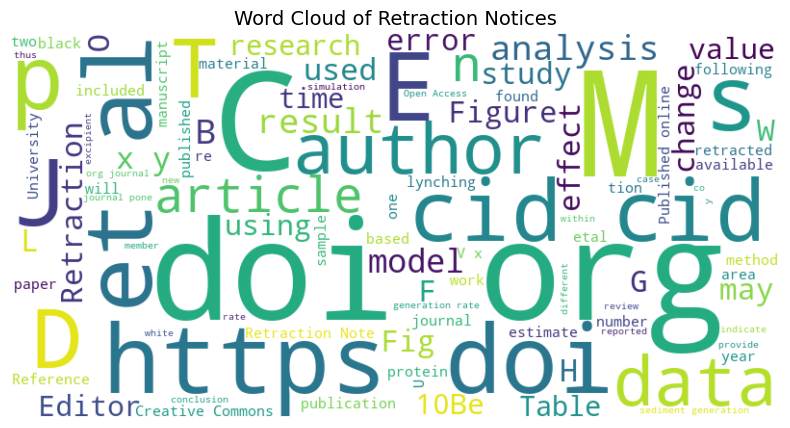

/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/619947042.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_coding_error["Text_Length"] = df1_coding_error["Text"].str.len()
/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/619947042.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_coding_error["Text_Length"] = df2_coding_error["Text"].str.len()
/var/folders/mh/1s5866l16_3dpfpwgr4pvdv80000gn/T/ipykernel_69431/619947042.py:23: SettingWithCopyWarning: 
A value is 

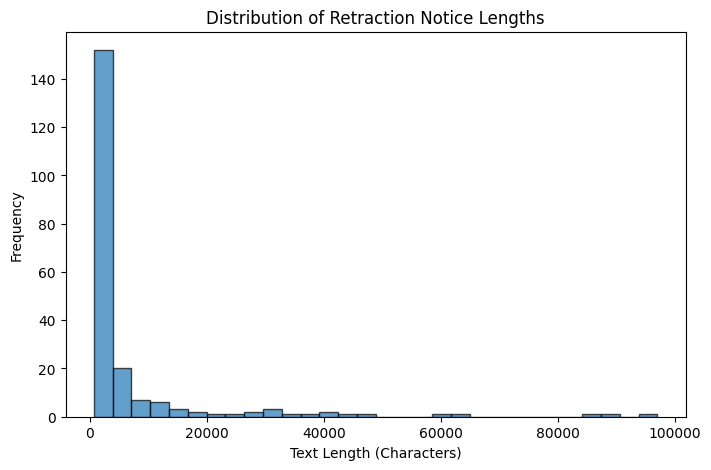

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Combine all text into a single string
text_corpus = " ".join(df1_coding_error["Text"].dropna())
text_corpus += " ".join(df2_coding_error["Text"].dropna())
text_corpus += " ".join(df3_coding_error["Text"].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(text_corpus)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Retraction Notices", fontsize=14)
plt.show()

# Text length distribution
df1_coding_error["Text_Length"] = df1_coding_error["Text"].str.len()
df2_coding_error["Text_Length"] = df2_coding_error["Text"].str.len()
df3_coding_error["Text_Length"] = df3_coding_error["Text"].str.len()

# Plot the distribution of text lengths

df = pd.concat([df1_coding_error, df2_coding_error, df3_coding_error])

plt.figure(figsize=(8, 5))
plt.hist(df["Text_Length"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Retraction Notice Lengths")
plt.show()


In [9]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not available
nltk.download("stopwords")
nltk.download("punkt")

# Convert text corpus to lowercase and tokenize
tokens = word_tokenize(text_corpus.lower())

# Remove stopwords and punctuation
stop_words = set(stopwords.words("english"))
tokens_clean = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get the most common words
word_freq = Counter(tokens_clean).most_common(20)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

# Plot word frequency
plt.figure(figsize=(10, 5))
plt.barh(word_freq_df["Word"], word_freq_df["Frequency"], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words in Retraction Notices")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Compute basic text statistics
num_documents = len(df)
avg_text_length = df["Text_Length"].mean()
unique_words = len(set(tokens_clean))

num_documents, avg_text_length, unique_words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushshah/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/ayushshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/ayushshah/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/share/nltk_data'
    - '/opt/homebrew/opt/python@3.11/Frameworks/Python.framework/Versions/3.11/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
